# Linear Regression (Regresia Liniara)


# Setul de date:

Fisierul `ex1data1.txt` contine intreg setul de date structurat dupa cum urmeaza: *prima coloana reprezinta populatia dintr-un oras iar a doua coloana profitul restaurantului in orasul respectiv.* In coloana cu profituri pot exista si valori negative lucru ce corespunde unei pierderi.
   
    

In [116]:

import numpy as np
from sklearn.metrics import mean_squared_error
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:

data = np.loadtxt('ex1data1.txt', delimiter=',')
X, y = data[:, 0], data[:, 1]
m = y.size
print(str(m) + ' exemple in setul de date')

97 exemple in setul de date


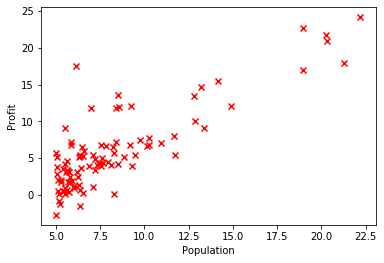

In [78]:

plt.scatter(X, y, color='r',marker='x')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()



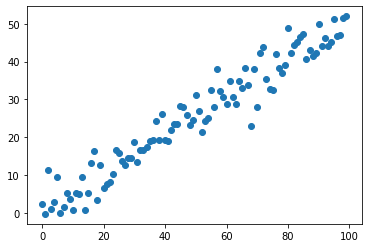

In [82]:
import matplotlib.pyplot as plt
import numpy as np
 
np.random.seed(5)
x = np.arange(0,100)
y = 0.5 + 1/2 * x + np.random.normal(0, 4, 100)
plt.plot(x, y, "o")
plt.show()

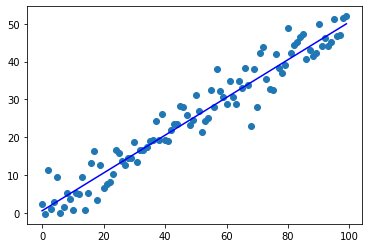

In [86]:
plt.plot(x, y, "o")
plt.plot(np.arange(0,100), eval('1/2 + 1/2*x'), "b")
plt.show()

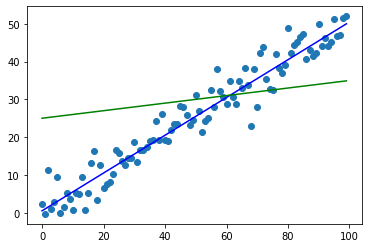

In [63]:
plt.plot(x, y, "o")
plt.plot(np.arange(0,100), eval('1/2 + 1/2*x'), "b")
plt.plot(np.arange(0,100), eval('25 + 0.1 * x'), "g")
plt.show()

In [137]:
# Citirea datelor despartite prin virgula din fisier
data = np.loadtxt('ex1data1.txt', delimiter=',')
X, y = data[:, 0], data[:, 1]
m = y.size  # number of training examples
print(str(m) + ' exemple in setul de date')

97 exemple in setul de date


### 1.1 Afisarea datelor###

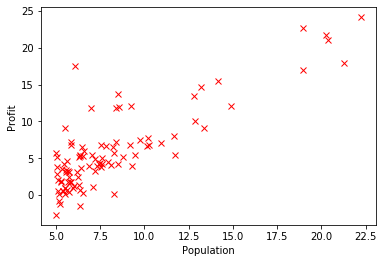

In [138]:
def plotData(X, y):

    
    # ====================== Codul vostru  ======================= 
    plt.figure()
    plt.plot(X, y,'rx')
    plt.xlabel('Population')
    plt.ylabel('Profit')
    
    plt.show()


    # ============================================================
plotData(X, y)

### 1.2 Calculul functiei eroare ###



In [139]:

X = np.stack([np.ones(m), X], axis=1)
print(X.shape)

(97, 2)


In [154]:
def h(theta, X): 

    h = np.multiply(X,theta)

    return h

def computeCost(X, y, theta):

    m = y.size  
    J = 0

    d=h(X,theta)
    J=mean_squared_error(y,d)/2
    return J

### 1.3 Gradient descent ###


In [123]:
def gradientDescent(X, y, theta, alpha, num_iters):
 
    m = y.size 
      theta = theta.copy()
    
    J_history = [] 
    theta_history = []
    
    for i in range(num_iters):
        
        theta_history.append(list(theta))

        d=h(x,theta)
        theta=theta-alpha*(1/m)*(X.dot(d-y))
        theta_history[i,:]=theta
        J_history[i]=J(theta,X,y)
        
        
        

        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history, theta_history

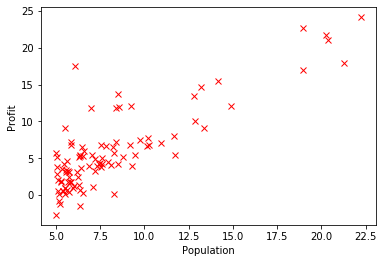

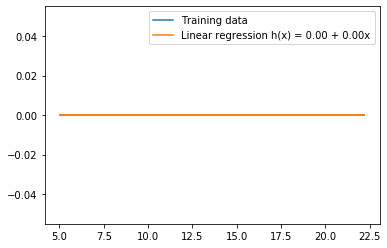

In [125]:
# plot the linear fit
plotData(X[:, 1], y)
plt.plot(X[:, 1], h(theta, X), '-')
plt.legend(['Training data', 'Linear regression' + ' h(x) = %0.2f + %0.2fx'%(theta[0],theta[1])]);

### 1.6 Vizualizarea J($\theta$) ###

739.9895269562597
4.495773287104502


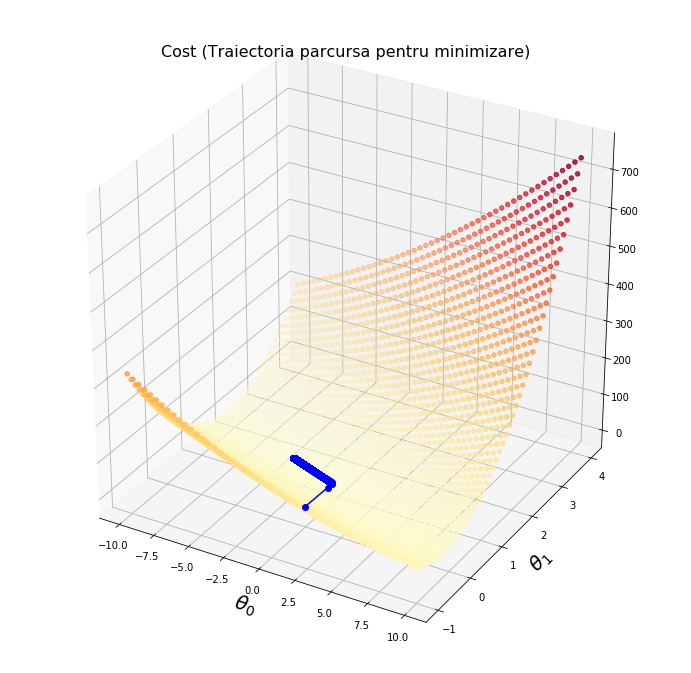

In [0]:
# import pentru afisarea 3D
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

# definirea figurii
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

# grid de valori pentru care vom calcula costul J
theta0_vals = np.linspace(-10, 10, 50)
theta1_vals = np.linspace(-1, 4, 50)

# definim un vector J_vals care in care vom stoca valoarea costurilor
J_vals = []

# definim 2 vectori in care sa stocam valorile parametriilor 
# theta folositi pentru calculul costlului J_vals
theta_0 = []
theta_1 = []

# calculam costul J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals.append(computeCost(X, y, [theta0, theta1]))
        theta_0.append(theta0)
        theta_1.append(theta1)

print(np.max(J_vals))
print(np.min(J_vals))
ax.scatter(theta_0,theta_1,J_vals,c=np.abs(J_vals),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=20)
plt.ylabel(r'$\theta_1$',fontsize=20)
plt.title('Cost (Traiectoria parcursa pentru minimizare)',fontsize=16)
plt.plot([x[0] for x in theta_history],[x[1] for x in theta_history],J_history,'bo-')
plt.show()